In [1]:
!python ddc.py
# amazon -> webcam non-perturbed

/home/weiceica/.venv/lib/python3.11/site-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/home/weiceica/.venv/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/weiceica/.venv/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weigh

In [3]:
!python attack.py
# perturb dataset using classic white box attack (square attack)

Processing .: 0it [00:00, ?it/s]
Processing dslr: 0it [00:00, ?it/s]
Processing dslr/mouse: 100%|████████████████████| 12/12 [00:03<00:00,  3.98it/s]
Processing amazon: 0it [00:00, ?it/s]
Processing amazon/mouse: 100%|████████████████| 100/100 [00:24<00:00,  4.08it/s]
Processing webcam: 0it [00:00, ?it/s]
Processing webcam/mouse: 100%|██████████████████| 30/30 [00:07<00:00,  4.09it/s]


In [4]:
!python ddc.py
# amazon -> webcam on perturbed dataset

/home/weiceica/.venv/lib/python3.11/site-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/home/weiceica/.venv/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/weiceica/.venv/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weigh

In [5]:
!python ddc.py
# webcam -> dslr unpreturbed

/home/weiceica/.venv/lib/python3.11/site-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/home/weiceica/.venv/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/weiceica/.venv/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weigh

In [6]:
!python ddc.py
# webcam -> dslr preturbed

/home/weiceica/.venv/lib/python3.11/site-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/home/weiceica/.venv/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/weiceica/.venv/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weigh

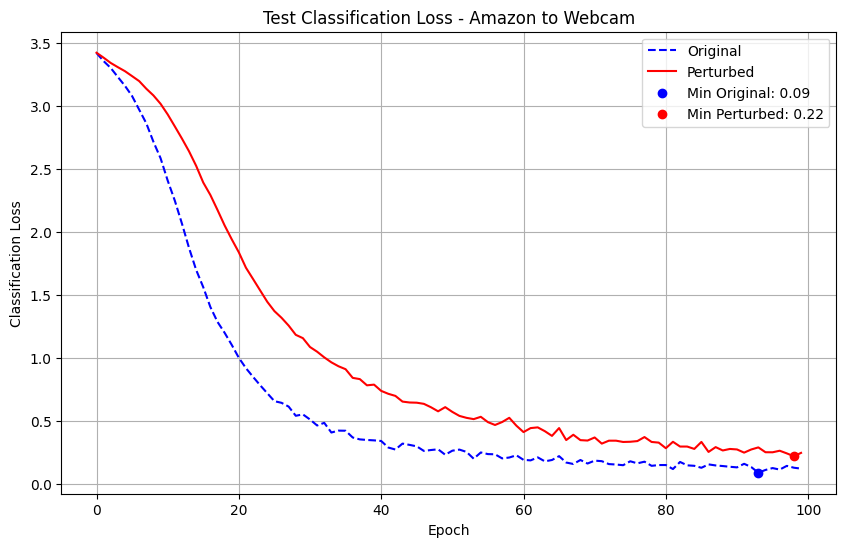

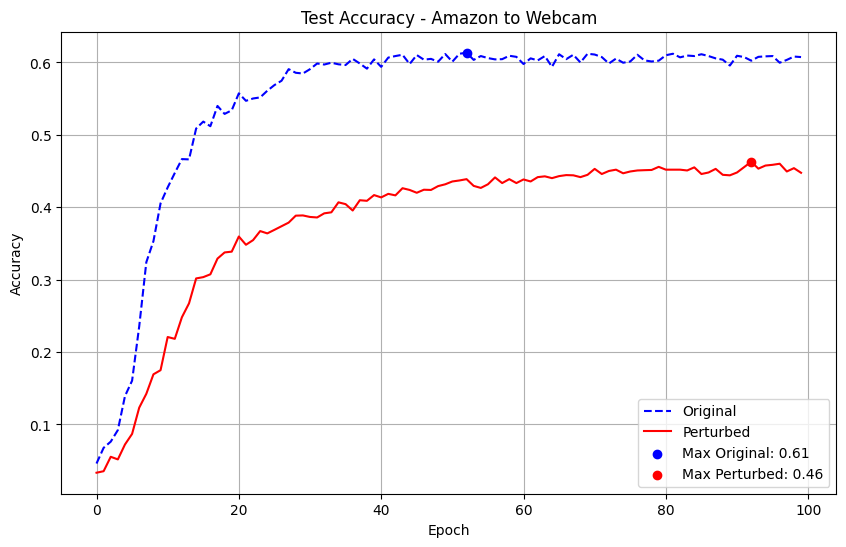

In [11]:
import re
import matplotlib.pyplot as plt

def parse_logs(file_path):
    with open(file_path, "r") as file:
        lines = file.readlines()

    cls_loss = []
    acc = []
    for line in lines:
        if "cls_loss" in line and "acc" in line:
            # Extract cls_loss and acc using regex
            cls_loss_match = re.search(r"cls_loss: ([\d\.]+)", line)
            acc_match = re.search(r"acc: ([\d\.]+)", line)
            if cls_loss_match and acc_match:
                cls_loss.append(float(cls_loss_match.group(1)))
                acc.append(float(acc_match.group(1)))
    return cls_loss, acc

original_file = "results/aw.txt"
perturbed_file = "results/awp.txt"

original_cls_loss, original_acc = parse_logs(original_file)
perturbed_cls_loss, perturbed_acc = parse_logs(perturbed_file)

plt.figure(figsize=(10, 6))
plt.plot(original_cls_loss, label="Original", color='blue', linestyle='--')
plt.plot(perturbed_cls_loss, label="Perturbed", color='red', linestyle='-')
min_original_loss_epoch = original_cls_loss.index(min(original_cls_loss))
min_perturbed_loss_epoch = perturbed_cls_loss.index(min(perturbed_cls_loss))
plt.scatter(min_original_loss_epoch, min(original_cls_loss), color='blue', label=f"Min Original: {min(original_cls_loss):.2f}", zorder=5)
plt.scatter(min_perturbed_loss_epoch, min(perturbed_cls_loss), color='red', label=f"Min Perturbed: {min(perturbed_cls_loss):.2f}", zorder=5)

plt.title("Test Classification Loss - Amazon to Webcam")
plt.xlabel("Epoch")
plt.ylabel("Classification Loss")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(original_acc, label="Original", color='blue', linestyle='--')
plt.plot(perturbed_acc, label="Perturbed", color='red', linestyle='-')
max_original_acc_epoch = original_acc.index(max(original_acc))
max_perturbed_acc_epoch = perturbed_acc.index(max(perturbed_acc))
plt.scatter(max_original_acc_epoch, max(original_acc), color='blue', label=f"Max Original: {max(original_acc):.2f}", zorder=5)
plt.scatter(max_perturbed_acc_epoch, max(perturbed_acc), color='red', label=f"Max Perturbed: {max(perturbed_acc):.2f}", zorder=5)
plt.title("Test Accuracy - Amazon to Webcam")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


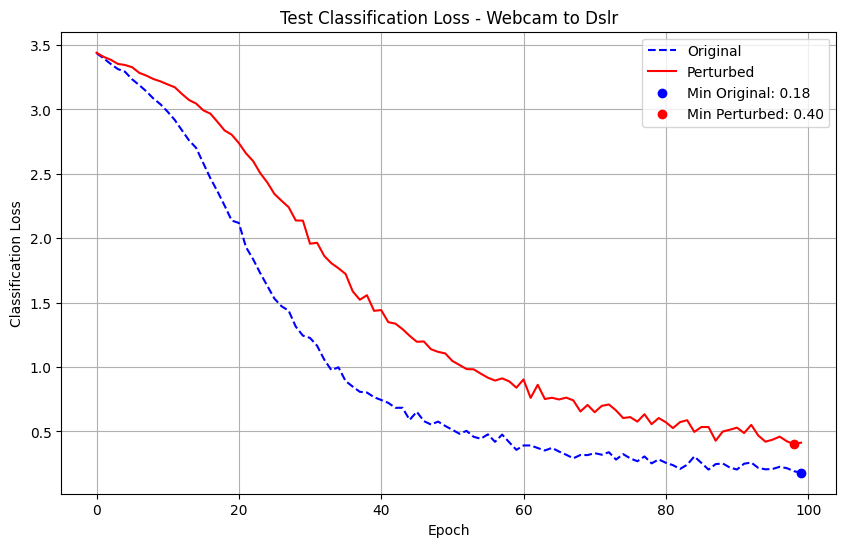

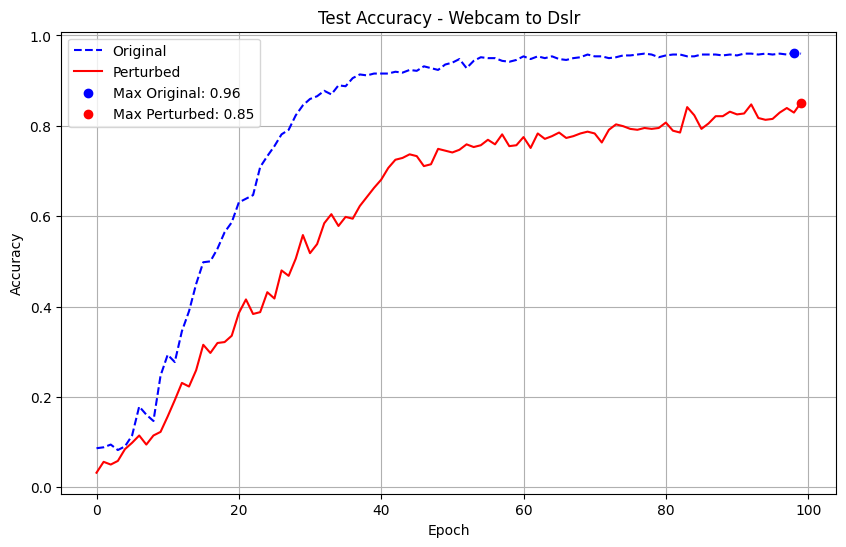

In [12]:
import re
import matplotlib.pyplot as plt

def parse_logs(file_path):
    with open(file_path, "r") as file:
        lines = file.readlines()

    cls_loss = []
    acc = []
    for line in lines:
        if "cls_loss" in line and "acc" in line:
            # Extract cls_loss and acc using regex
            cls_loss_match = re.search(r"cls_loss: ([\d\.]+)", line)
            acc_match = re.search(r"acc: ([\d\.]+)", line)
            if cls_loss_match and acc_match:
                cls_loss.append(float(cls_loss_match.group(1)))
                acc.append(float(acc_match.group(1)))
    return cls_loss, acc

original_file = "results/wd.txt"
perturbed_file = "results/wdp.txt"

original_cls_loss, original_acc = parse_logs(original_file)
perturbed_cls_loss, perturbed_acc = parse_logs(perturbed_file)

plt.figure(figsize=(10, 6))
plt.plot(original_cls_loss, label="Original", color='blue', linestyle='--')
plt.plot(perturbed_cls_loss, label="Perturbed", color='red', linestyle='-')
min_original_loss_epoch = original_cls_loss.index(min(original_cls_loss))
min_perturbed_loss_epoch = perturbed_cls_loss.index(min(perturbed_cls_loss))
plt.scatter(min_original_loss_epoch, min(original_cls_loss), color='blue', label=f"Min Original: {min(original_cls_loss):.2f}", zorder=5)
plt.scatter(min_perturbed_loss_epoch, min(perturbed_cls_loss), color='red', label=f"Min Perturbed: {min(perturbed_cls_loss):.2f}", zorder=5)

plt.title("Test Classification Loss - Webcam to Dslr")
plt.xlabel("Epoch")
plt.ylabel("Classification Loss")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(original_acc, label="Original", color='blue', linestyle='--')
plt.plot(perturbed_acc, label="Perturbed", color='red', linestyle='-')
max_original_acc_epoch = original_acc.index(max(original_acc))
max_perturbed_acc_epoch = perturbed_acc.index(max(perturbed_acc))
plt.scatter(max_original_acc_epoch, max(original_acc), color='blue', label=f"Max Original: {max(original_acc):.2f}", zorder=5)
plt.scatter(max_perturbed_acc_epoch, max(perturbed_acc), color='red', label=f"Max Perturbed: {max(perturbed_acc):.2f}", zorder=5)
plt.title("Test Accuracy - Webcam to Dslr")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()
